# Shared and population-specific genetic variation

This analysis aimed to answer the following research question: 

1. To what extent is genetic variation shared or unique within African population groups?

To achieve this the following steps were performed:

1. Genetic variant data was aggregated based on ethnolinguistic group. The variants unique to each population group and shared between population groups were then visualised using upset plots, which allow for visual comparison of overlapping or intersecting sets or categories. 
2. Next, genetic variant data was aggregated based on geographic region (Central, Southern, Eastern and Western Africa). The variants unique to each region and shared between regions were then visualised using upset plots.



## Imports

Import relevant libraries and packages

In [46]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import pandas as pd
import upsetplot
from matplotlib import pyplot as plt
import seaborn as sns
import Utils.constants as constants
import Utils.functions as functions

## Data loading

Import the processed African variant count data from the `Data/Processed/IH_allele_counts.csv` file. This file includes the following information:

* `ID`: A unique variant identifier.
* `VAR_NAME`: The non-unique name of the variant.
* `POS`: The nucleotide position at which the genetic variant is located within the genome.
* `ALT` and `REF`: An allele refers to the different forms of a specific variant that can exist at a particular genetic position. For each variant, there are two alleles, the normal form known as the reference allele (REF), and the altered form known as the alternate allele (ALT). These alleles define the genetic variation at a given position.
* `GENE`: The gene in which the variant is located.
* `SUB_POP`: The African ethnolinguistic subpopulation from which the genetic data sample originated.
* `IH_ALT_CTS`: This shows how many times each genetic variant's alternate allele (ALT) appears in all the samples of a population.
* `IH_TOTAL_CTS`: This provides the overall count of all genetic variants' alleles (both REF and ALT) mentioned in the data.
* `IH_REF_CTS`: This shows how many times each genetic variant's reference allele form (REF) appears in all the samples of a population.
* `REG`: The regional classification of the sample's ethnolinguistic group. The possible regions are:
  - Central Africa (CA)
  - Southern Africa (SA)
  - Eastern Africa (EA)
  - Western Africa (WA)
* `IH_AF`: The frequency of the variant's alternate allele in all samples of the population.
* `VARIANT_TYPE`: The type of variant. The possible types are:
    - INDEL
    - SNP

In [47]:
ih_allele_counts = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
)

ih_allele_counts.head(5)

,ID,VAR_NAME,VARIANT_TYPE,POS,REF,ALT,GENE,SUB_POP,REG,IH_REF_CTS,IH_ALT_CTS,IH_TOTAL_CTS,IH_AF
0,110148882_C_CT,chr13:110148882C-CT,INDEL,110148882,C,CT,COL4A1,Bantu Kenya,EA,20,0,20,0.0
1,110148882_C_CT,chr13:110148882C-CT,INDEL,110148882,C,CT,COL4A1,Yoruba,WA,276,0,276,0.0
2,110148882_C_CT,chr13:110148882C-CT,INDEL,110148882,C,CT,COL4A1,San,SA,12,0,12,0.0
3,110148882_C_CT,chr13:110148882C-CT,INDEL,110148882,C,CT,COL4A1,Mende,WA,166,0,166,0.0
4,110148882_C_CT,chr13:110148882C-CT,INDEL,110148882,C,CT,COL4A1,Mbuti Pygmy,CA,24,0,24,0.0


Import the processed sample population data from the `Data/Processed/Sample_populations.csv` file. This file includes the following information:

- `SAMPLE_NAME`: The unique identifier for each sample.
- `SUB`: The African ethnolinguistic classification of each sample, also known as the subpopulation group. The possible classifications are:
  - Mandinka
  - Esan
  - Mende
  - Mbuti Pygmy
  - Biaka Pygmy
  - Mandenka
  - Yoruba (HGDP and 1000G)
  - San
  - Bantu South Africa
  - Luhya
- `REG`: The regional classification of the sample's ethnolinguistic group. The possible regions are:
  - Central Africa (CA)
  - Southern Africa (SA)
  - Eastern Africa (EA)
  - Western Africa (WA)

In [48]:
sample_subpopulations = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
)

sample_subpopulations.head(5)

,SUB,SAMPLE_NAME,REG
0,Mandinka,HG02461,WA
1,Mandinka,HG02462,WA
2,Mandinka,HG02464,WA
3,Mandinka,HG02465,WA
4,Mandinka,HG02561,WA


## Data analysis and visualisation


### Data exploration

Conduct a brief exploration of the data to determine the number of samples present and whether missing values are present.

Are there any missing values in the variant count data?

In [49]:
ih_allele_counts.isnull().any()

ID              False
VAR_NAME        False
VARIANT_TYPE    False
POS             False
REF             False
ALT             False
GENE            False
SUB_POP          True
REG             False
IH_REF_CTS      False
IH_ALT_CTS      False
IH_TOTAL_CTS    False
IH_AF            True
dtype: bool

How many unique variants are there? 

In [50]:
ih_allele_counts.ID.nunique()

21608

Remove variants that are not present in Africans (IH_ALT_CTS of 0)

In [51]:
ih_allele_counts_afr = ih_allele_counts[(ih_allele_counts.REG == "Recent African") & (ih_allele_counts.IH_ALT_CTS > 0)]
ih_allele_counts_afr.head(5)

,ID,VAR_NAME,VARIANT_TYPE,POS,REF,ALT,GENE,SUB_POP,REG,IH_REF_CTS,IH_ALT_CTS,IH_TOTAL_CTS,IH_AF
12,110148891_C_G,rs552586867,SNP,110148891,C,G,COL4A1,NaN,Recent African,1219,1,1220,0.000820
28,110148917_C_G,rs59409892,SNP,110148917,C,G,COL4A1,NaN,Recent African,1101,119,1220,0.097541
146,110149176_T_A,rs546124548,SNP,110149176,T,A,COL4A1,NaN,Recent African,1219,1,1220,0.000820
252,110149349_G_A,rs139916479,SNP,110149349,G,A,COL4A1,NaN,Recent African,1215,5,1220,0.004098
289,110149494_C_T,rs552877576,SNP,110149494,C,T,COL4A1,NaN,Recent African,1219,1,1220,0.000820


How many unique variants are there after removing variants with alternate allele count of 0 in Africans? 

In [52]:
ih_allele_counts_afr.ID.count()

8867

How many INDELs and SNPs are there?

In [53]:
ih_allele_counts_afr[ih_allele_counts_afr.VARIANT_TYPE=="INDEL"].ID.count()

1975

In [54]:
ih_allele_counts_afr[ih_allele_counts_afr.VARIANT_TYPE=="SNP"].ID.count()

6892

Get a breakdown of the number of variants found in each gene

In [55]:
gene_variant_breakdown = ih_allele_counts_afr[['GENE','ID']].groupby("GENE").nunique().sort_values(["ID"]).reset_index().set_index("GENE")
gene_variant_breakdown

,ID
GENE,
TNF,34
OLIG2,58
IL1B,110
IL6,117
IL10,119
AP4B1,153
MTHFR,481
AGT,501
NOS3,542


### Gene variant counts

Set plot parameters

In [56]:
plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Visualise the variant count per gene using a bar plot

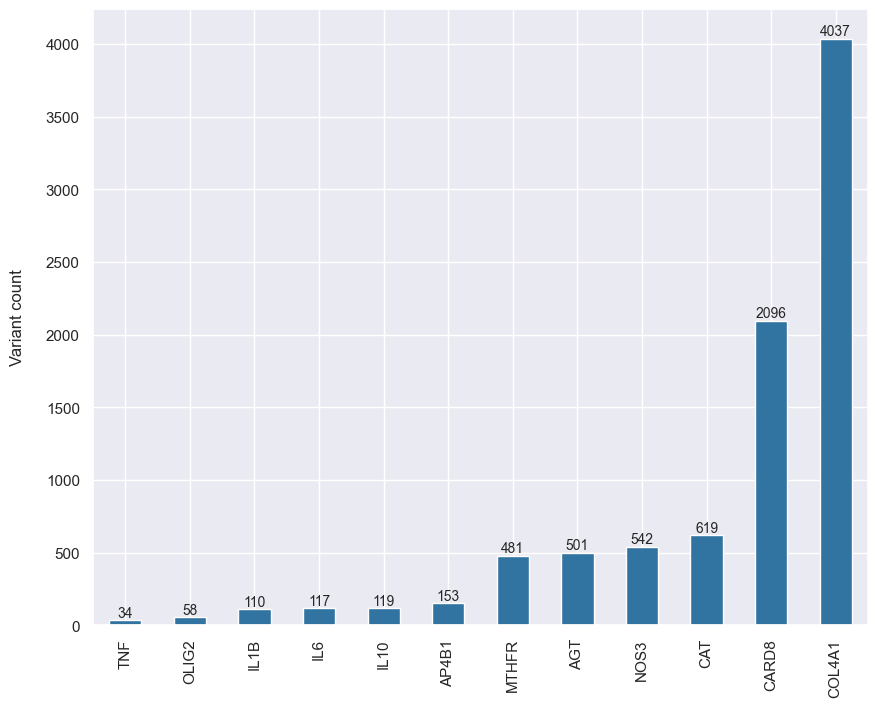

In [57]:
# Set the figure size
sns.set(rc={"figure.figsize": (10, 8)})

# Set the color palette to 'tab20' with 12 colors
palette = sns.set_palette("tab20", 12)

# Plot the gene variant breakdown as a bar chart
ax = gene_variant_breakdown.plot.bar(color="#3274A1")

# Remove the x-axis label
plt.xlabel(None)

# Set the y-axis label to 'Variant count' with a label padding of 15
plt.ylabel("Variant count", labelpad=15)

# Remove the legend
plt.legend().remove()

# Annotate the bars with their respective heights
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10)

# Save the figure with high resolution and tight bounding box
plt.savefig(r"..\Results\Figures\2a-Gene_variant_breakdown.png", dpi=1200, bbox_inches="tight")

# Display the plot
plt.show()

### Unique and shared variation between regions

Determine the unique and shared variation between population groups from Central, Southern, Eastern, and Southern African regions.

In [58]:
# Group the data by variant attributes and region, summing up numeric values
region_specific_allele_counts = ih_allele_counts.groupby(
    by=["VAR_NAME", "ID", "POS", "REF", "ALT", "VARIANT_TYPE", "GENE", "REG"]
).sum(numeric_only=True)

# Filter out variants with an alternate allele count of 0, as they are not present in the region
region_specific_allele_counts = (
    region_specific_allele_counts[~(region_specific_allele_counts.IH_ALT_CTS == 0)]
    .drop(columns="IH_AF")
    .reset_index()
)

# Remove rows where the region is 'Recent African' from the dataset
region_specific_allele_counts = region_specific_allele_counts[
    ~(
        (region_specific_allele_counts.REG == "Recent African")
    )
]

# Create a dictionary where keys are regions and values are lists of unique variant IDs for each region
region_variant_dict = {}
for region in region_specific_allele_counts.REG.unique():
    region_variants = region_specific_allele_counts[
        region_specific_allele_counts.REG == region
    ]["ID"].unique()
    region_variant_dict[region] = region_variants

# Generate a set of all unique variants across all regions
all_variants = set()
for value in region_variant_dict.values():
    all_variants.update(value)

# Compute overlap in variants for each region
variant_overlap = pd.DataFrame()

for region in region_specific_allele_counts.REG.unique():
    # Create a DataFrame indicating whether each variant is present in the current region
    region_variant_overlap = pd.DataFrame(
        [[e in region_variant_dict[region]] for e in all_variants], columns=[region]
    )
    variant_overlap = pd.concat([variant_overlap, region_variant_overlap], axis=1)

# Group the variants by region and count occurrences
variant_overlap_grouped = variant_overlap.groupby(
    by=variant_overlap.columns.tolist()
).size()

# Display the grouped counts
variant_overlap_grouped

EA     SA     WA     CA   
False  False  False  True      513
              True   False    2818
                     True      207
       True   False  False     368
                     True       65
              True   False      66
                     True       55
True   False  False  False     698
                     True      108
              True   False     881
                     True      683
       True   False  False      34
                     True       17
              True   False     251
                     True     2103
dtype: int64

Plot the overlap of variants for each African region using upset plots

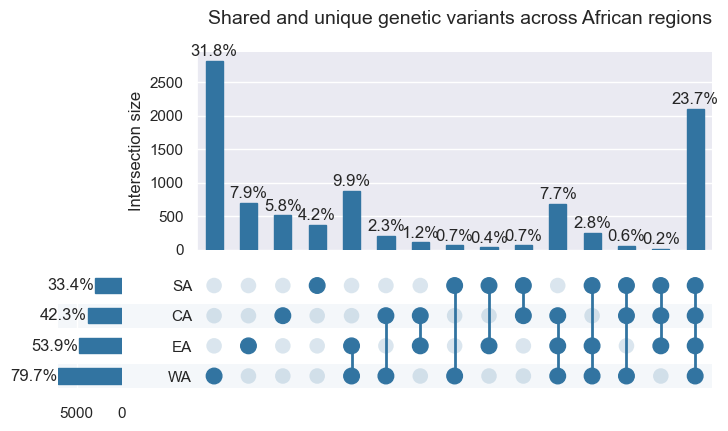

In [59]:
# Plot an upset plot to visualize the overlap of genetic variants across African regions
upsetplot.plot(
    variant_overlap_grouped,
    show_percentages=True,
    orientation="horizontal",
    facecolor="#3274A1",
)

# Set the title of the plot with specific formatting
plt.title(
    "Shared and unique genetic variants across African regions",
    size=constants.BIGGER_FONT,
    pad=20,
    loc="right",
)

# Save the plot as a high-resolution PNG file
plt.savefig(r"..\Results\Figures\2b-Shared_and_population_specific_variation_regions.png", dpi=1200)

# Display the plot
plt.show()

From the above plot, we observe that only 23.7% of genetic variants were shared by populations in Central, Southern, Eastern and Western Africa. This is indicative of the high genetic diversity in African populations.

Western African populations contributed the most  unique variants (31.8%) to the analysis, while Southern African populations contributed the least (4.2%). The data seems to indicate that there may be a correlation between the number of unique variants contributed by a region and the sample size of the region, since Western African populations made up the majority of the samples, and Southern African populations the least.


### Unique and shared variation between ethnolinguistic groups

Determine the unique and shared variation at a more granular scale between ethnolinguistic population groups.

In [60]:
# Group the data by variant attributes and ethnolinguistic group, summing numeric values
subpop_specific_allele_counts = ih_allele_counts.groupby(
    by=["VAR_NAME", "ID", "POS", "REF", "ALT", "VARIANT_TYPE", "GENE", "SUB_POP"]
).sum(numeric_only=True)

# Filter out variants with an alternate allele count of 0, as these variants are not present in the group
subpop_specific_allele_counts = (
    subpop_specific_allele_counts[~(subpop_specific_allele_counts.IH_ALT_CTS == 0)]  # Exclude rows where IH_ALT_CTS is 0
    .drop(columns="IH_AF")
    .reset_index()
)

# Create a dictionary where keys are ethnolinguistic groups and values are lists of unique variant IDs for each group
subpop_variant_dict = {}
for subpop in subpop_specific_allele_counts.SUB_POP.unique():
    subpop_variants = subpop_specific_allele_counts[
        subpop_specific_allele_counts.SUB_POP == subpop
    ]["ID"].unique()
    subpop_variant_dict[subpop] = subpop_variants

# Generate a set of all unique variants across all ethnolinguistic groups
all_variants = set()
for value in subpop_variant_dict.values():
    all_variants.update(value)

# Compute overlap in variants for each ethnolinguistic group
variant_overlap = pd.DataFrame()

for subpop in subpop_specific_allele_counts.SUB_POP.unique():
    # Create a DataFrame indicating whether each variant is present in the current ethnolinguistic group
    subpop_variant_overlap = pd.DataFrame(
        [[e in subpop_variant_dict[subpop]] for e in all_variants], columns=[subpop]
    )
    variant_overlap = pd.concat([variant_overlap, subpop_variant_overlap], axis=1)

# Group the variants by ethnolinguistic group and count occurrences
variant_overlap_grouped = variant_overlap.groupby(
    by=variant_overlap.columns.tolist()
).size()

# Display the grouped counts
variant_overlap_grouped  

Luhya  San    Mandinka  Yoruba  Bantu South Africa  Mandenka  Bantu Kenya  Biaka Pygmy  Esan   Mbuti Pygmy  Mende
False  False  False     False   False               False     False        False        False  False        True      436
                                                                                               True         False     200
                                                                                        True   False        False     343
                                                                                                            True       16
                                                                                               True         False       2
                                                                                                                     ... 
True   True   True      True    True                True      False        True         True   True         True       55
                                

Plot overlap of variants for each ethnolinguistic group using upset plots

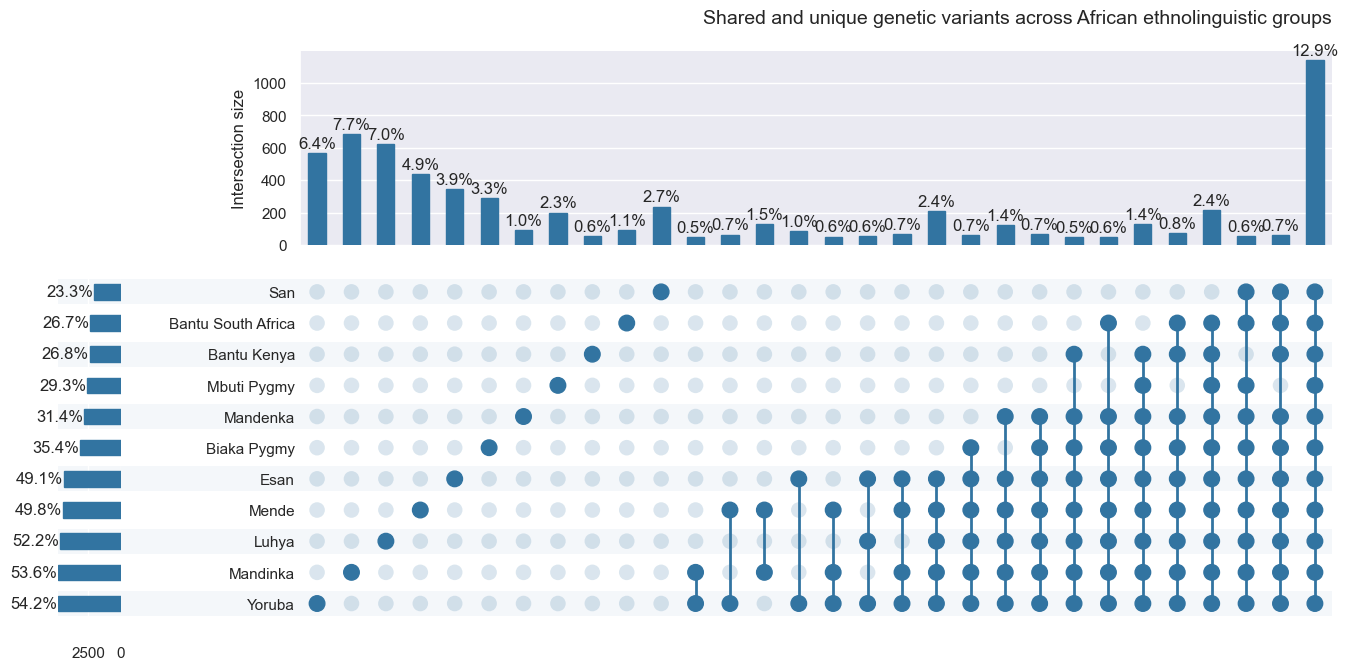

In [61]:
# Plot an upset plot to visualize the overlap and uniqueness of genetic variants across African ethnolinguistic groups
upsetplot.plot(
    variant_overlap_grouped,
    min_subset_size="0.5%",
    show_percentages=True,
    orientation="horizontal",
    facecolor="#3274A1"
)

# Set the title of the plot with specific formatting
plt.title(
    "Shared and unique genetic variants across African ethnolinguistic groups",
    size=constants.BIGGER_FONT,
    pad=20,
    loc="right",
)

# Save the plot as a high-resolution PNG file
plt.savefig(r"..\Results\Figures\2c-Shared_and_population_specific_variation_ethnolinguistic.png", dpi=1200)

# Display the plot
plt.show()

From the above plot, we observe that only 12.9% of genetic variants were shared by all subpopulation groups. This is indicative of the high genetic diversity in African populations.

Western African groups, such as the Mandinka and Yoruba, contributed the most  unique variants to the analysis, while Southern African populations, such as the San, contributed the least. The data seems to indicate that there may be a correlation between the number of unique variants contributed and the sample size, since Western African populations made up the majority of the samples, and Southern African populations the least.

### Correlation between sample size and number of unique variants

Calculate the degree of correlation between the number of samples comprising a ethnolinguistic population group and the number of unique variants contributed. 

In [62]:
# Create a dictionary with data on unique variants and sample sizes for each ethnolinguistic group
unique_variant_regional_data = {
    "SUB_POP": ["Yoruba", "Mandinka", "Luhya", "Mende", "Esan", "Biaka Pygmy", "Mandenka", "Mbuti Pygmy", "Bantu Kenya", "Bantu South Africa", "San"],
    "UNIQUE_VARIANT_PERCENT": [6.4, 7.7, 7, 4.9, 3.9, 3.3, 1.0, 2.3, 0.6, 1.1, 2.7],
    "SAMPLE SIZE": [138, 116, 92, 83, 103, 22, 20, 12, 10, 8, 6]
}

# Convert the dictionary to a DataFrame for easier analysis and manipulation
unique_variant_regional = pd.DataFrame(unique_variant_regional_data)

# Display the first 5 rows of the DataFrame to check the contents
unique_variant_regional.head(5)

,SUB_POP,UNIQUE_VARIANT_PERCENT,SAMPLE SIZE
0,Yoruba,6.4,138
1,Mandinka,7.7,116
2,Luhya,7.0,92
3,Mende,4.9,83
4,Esan,3.9,103


In [63]:
# Calculate the correlation 
unique_variant_regional.corr(numeric_only=True)

,UNIQUE_VARIANT_PERCENT,SAMPLE SIZE
UNIQUE_VARIANT_PERCENT,1.000000,0.875011
SAMPLE SIZE,0.875011,1.000000


There is a strong positive correlation (> 0.87) between the sample size of a region and the number of unique variants contributed by that region. As the majority of samples in this analysis are from Western Africa (80%), the genetic variants under examination are skewed towards Western African populations.